# 1. Extracción de imágenes de Google

In [3]:
import hashlib
from PIL import Image
import io, os
import requests
import time
import selenium
from selenium import webdriver

In [4]:
wd = webdriver.Chrome('chromedriver.exe')

In [5]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=2):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        print(image_count,max_links_to_fetch)
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        
        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [6]:
def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [7]:
def search_and_download(search_term:str,driver_path:str,target_path='./images',number_images=5):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.1)
        
    for elem in res:
        persist_image(target_folder,elem)

In [8]:
search_term = 'patinete'
search_and_download(search_term,'chromedriver.exe',number_images=100)

0 100
Found: 100 search results. Extracting links from 0:100
87 100
Found: 112 search results. Extracting links from 100:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extractin

Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting li

Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting li

Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting links from 112:112
89 100
Found: 112 search results. Extracting li

SUCCESS - saved https://www.storececotec.com/6668-large_default/bongo-serie-a.jpg - as ./images\patinete\a10f58dfad.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQQeNGPRUQdj4linaF1oovfMWEziDVIHHDZLA&usqp=CAU - as ./images\patinete\02fa04c9a5.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ08-CTb4ZcEkU8fHUkSVhWOZn9yDWx0xp7Yw&usqp=CAU - as ./images\patinete\27e29c723c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRspUFDmetZBYbR9dQFotLaqAr8k6_sVI15lw&usqp=CAU - as ./images\patinete\4889ce58b1.jpg
SUCCESS - saved https://www.toysrus.es/medias/?context=bWFzdGVyfHByb2R1Y3RfaW1hZ2VzfDE0Mjc1fGltYWdlL2pwZWd8aGQzL2g1Yi84OTQ0NzI1MDY1NzU4fDkxZTU4MGYzOGMxYWY2ODMzODhiZDVlMjk4MjQxMzU3NmE4ZTcwOWMwODIzZTc0YTkzZDYwZDhlODFkMjJlOGY - as ./images\patinete\1ee325aa42.jpg
SUCCESS - saved https://images-na.ssl-images-amazon.com/images/I/61GyNWgpniL._AC_SX466_.jpg - as ./images\patinete\824217a55c.jpg
SUCCESS - saved https://enc

SUCCESS - saved https://www.electrodomesticosweb.es/images/product/1/large/pl_1_1_196919.png - as ./images\patinete\db3058b453.jpg
SUCCESS - saved https://cdn.shopify.com/s/files/1/0215/8618/2208/products/b87f22bc-b71b-4728-84f8-c030db3b8a8a_800x.jpg?v=1622807678 - as ./images\patinete\42af5f014f.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjCjzo036yc-fZKgqLvOmhYzufn7OvOFm3MQ&usqp=CAU - as ./images\patinete\1bfd691df1.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSf6b5BAjt_P55e3h7VRAfYJvbj_hCaMN-QQQ&usqp=CAU - as ./images\patinete\f16820e4f7.jpg
SUCCESS - saved https://static.carrefour.es/hd_510x_/imagenes/products/84355/56904/823/8435556904823/imagenGrande1.jpg - as ./images\patinete\1f35599452.jpg
ERROR - Could not save https://img.pccomponentes.com/articles/34/343642/1536-segway-ninebot-kickscooter-e45e-patinete-electrico.jpg - cannot identify image file <_io.BytesIO object at 0x0000026A63FFD228>
SUCCESS - saved https://ecoxt

In [9]:
search_term = 'bicicleta'
search_and_download(search_term,'chromedriver.exe',number_images=100)

0 100
Found: 100 search results. Extracting links from 0:100
40 100
Found: 112 search results. Extracting links from 100:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extractin

Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting li

Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting li

Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting links from 112:112
42 100
Found: 112 search results. Extracting li

Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting li

Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting links from 312:312
84 100
Found: 312 search results. Extracting li

SUCCESS - saved https://cdn.computerhoy.com/sites/navi.axelspringer.es/public/styles/1200/public/media/image/2021/04/vivi-bicicleta-electrica-2305021.jpg?itok=KHC18vvM - as ./images\bicicleta\a09646f4de.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQplkrVg6kdi1PtU53Wl6LZawfNgpWZB3scDw&usqp=CAU - as ./images\bicicleta\c5088ec84f.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTauww2iKk7cNuKmBjpJ74G6lgJXWe6CZHyhg&usqp=CAU - as ./images\bicicleta\92324ee3f0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXUthYkXcqGxD2PZgXyXdtlSuQVsZbGnLGSg&usqp=CAU - as ./images\bicicleta\e0f68033f4.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREYXFyO0K9R8M026RYg3X4RyZ_vKEgxwQnNA&usqp=CAU - as ./images\bicicleta\9c89be7ba0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2uM8SVbdT6Xsu65UaiMX1rfCzkes2WBw0aA&usqp=CAU - as ./images\bicicleta\d94753e221.jpg
SUCCESS - saved ht

SUCCESS - saved https://m.media-amazon.com/images/I/712UgY14vRS._AC_SX425_.jpg - as ./images\bicicleta\721671e65a.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYJnsoRy582n-dAY5IcWZ2dKtRpM-BADvbvg&usqp=CAU - as ./images\bicicleta\0122e433bc.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSE-_mZtLQOyjPtzpMibDDY-mYWn4W1TiLNlA&usqp=CAU - as ./images\bicicleta\21968795af.jpg
SUCCESS - saved https://static.carrefour.es/hd_336x_/crs/cdn_static/catalog/hd/065684_00_1.jpg - as ./images\bicicleta\225f6c53c2.jpg
SUCCESS - saved https://offloadmedia.feverup.com/madridsecreto.co/wp-content/uploads/2018/06/08113613/bicis-madrid.jpg - as ./images\bicicleta\4d67da0251.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYJ-udTY7K9b19_Bzmh_ruZHaPjFUUAljQpA&usqp=CAU - as ./images\bicicleta\67cb217778.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRL4AIt0t5HJWFp6YIbbDDAyR9SkDIibiP7ug&usqp=CAU - as ./im

# 2. Data Augmentation

In [10]:
from keras.preprocessing.image import ImageDataGenerator
import os
from os.path import isfile, join
import pandas as pd
import numpy as np
from skimage.io import imread

Using TensorFlow backend.


In [12]:
# 1. Iniciar el data generator
datagen = ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.15,
                            zoom_range=0.1,
                            channel_shift_range=10,
                            horizontal_flip=True)

In [15]:
# 2. Aplicar las transfromaciones en una imagen
patinetes = ['images/patinete/'+ f for f in os.listdir('images/patinete') if isfile(join('images/patinete', f))]
image_path = patinetes[0]
image = np.expand_dims(imread(image_path),axis=0)

In [16]:
# 3. Selecciona dónde quieres guardar las imágenes transformadas
save_here = 'images/patinete/aug'
try:
    os.stat(save_here)
except:
    os.mkdir(save_here)

In [17]:
# Fit de la imagen original
datagen.fit(image)

In [18]:
for x, val in zip(datagen.flow(image,           #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(10)):     # here we define a range because we want 10 augmented images 
    pass

In [19]:
# Para todos las imágenes de la clase 1
for image_path in patinetes:
    image = np.expand_dims(imread(image_path),axis=0)
    datagen.fit(image)
    for x, val in zip(datagen.flow(image,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(3)):     # here we define a range because we want 10 augmented images 
        pass

In [20]:
# Realiza la misma operación para las bicicletas
bicicletas = ['images/bicicleta/'+ f for f in os.listdir('images/bicicleta') if isfile(join('images/bicicleta', f))]
save_here = 'images/bicicleta/aug'
try:
    os.stat(save_here)
except:
    os.mkdir(save_here)  
    
for image_path in bicicletas:
    image = np.expand_dims(imread(image_path),axis=0)
    datagen.fit(image)
    for x, val in zip(datagen.flow(image,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(3)):     # here we define a range because we want 10 augmented images 
        pass

# 3. Preparar los datos

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

In [25]:
# Read data
X = []
Y = []
for file in os.listdir('images/patinete/aug'):
    image = imread('images/patinete/aug/'+file)
    smallimage = cv2.resize(image,(64,64))
    X.append(smallimage)
    Y.append(0)
    
for file in os.listdir('images/bicicleta/aug'):
    image = imread('images/bicicleta/aug/'+file)
    smallimage = cv2.resize(image,(64,64))
    X.append(smallimage)
    Y.append(1)

In [26]:
X,Y = np.array(X), np.array(Y)

In [29]:
X = X/255.0
print('Min:',np.min(X))
print('Max:',np.max(X))

Min: 0.0
Max: 1.0


In [30]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=42)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, 
                                                    random_state=40)
print(X_train.shape); print(X_test.shape)

(609, 64, 64, 3)
(153, 64, 64, 3)


#  Transfer Learning

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(64,64,3),
                  include_top = False,
                   weights = 'imagenet'
                  )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [35]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [36]:
for layer in base_model.layers:
    layer.trainable = False

In [37]:
    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output) # Añado una flatten a la salida del base_model, al cual le quité el top CAPA(CAPA ANTERIOR)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x) # Añado una densa a x (flatten)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:
vgghist = model.fit(X_train,y_train,
                    epochs = 10)

Epoch 1/10
609/609 [==============================] - 20s 33ms/sample - loss: 0.3688 - acc: 0.8374
Epoch 2/10
609/609 [==============================] - 20s 32ms/sample - loss: 0.1097 - acc: 0.9622
Epoch 3/10
609/609 [==============================] - 19s 31ms/sample - loss: 0.0637 - acc: 0.9787
Epoch 4/10
609/609 [==============================] - 19s 31ms/sample - loss: 0.0311 - acc: 0.9934
Epoch 5/10
609/609 [==============================] - 19s 31ms/sample - loss: 0.0223 - acc: 0.9934
Epoch 6/10
609/609 [==============================] - 20s 32ms/sample - loss: 0.0171 - acc: 0.9984
Epoch 7/10
609/609 [==============================] - 24s 39ms/sample - loss: 0.0135 - acc: 0.9984
Epoch 8/10
609/609 [==============================] - 24s 39ms/sample - loss: 0.0170 - acc: 0.9967
Epoch 9/10
609/609 [==============================] - 18s 30ms/sample - loss: 0.0126 - acc: 0.9984
Epoch 10/10
609/609 [==============================] - 18s 29ms/sample - loss: 0.0077 - acc: 0.9984


In [39]:
results = model.evaluate(X_test, y_test)
print("test loss, test accuracy", results)

153/153 [==============================] - 4s 29ms/sample - loss: 0.0084 - acc: 1.0000
test loss, test accuracy [0.008406057643393675, 1.0]


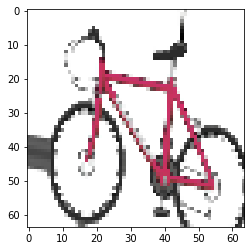

In [43]:
plt.imshow(X_test[3])

In [45]:
model.predict(np.expand_dims(X_test[3], axis=0))

array([[0.9992662]], dtype=float32)